In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [62]:
matches=pd.read_csv('matches.csv')
matches.info()
matches.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [63]:
matches[pd.isnull(matches['city'])]
#find all NaN values in winner column, so that we update this as draw

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [64]:
# Keeping only consistent teams
consistent_teams = ['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Chennai Super Kings',
                 'Rajasthan Royals','Kings XI Punjab',
                 'Sunrisers Hyderabad','Delhi Capitals']

In [65]:
matches= matches[(matches['team1'].isin(consistent_teams)) & (matches['team2'].isin(consistent_teams))]

In [66]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Kings XI Punjab', 'Mumbai Indians',
       'Chennai Super Kings', 'Rajasthan Royals'], dtype=object)

In [67]:
matches['team2'].unique()

array(['Royal Challengers Bangalore', 'Mumbai Indians', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Rajasthan Royals',
       'Chennai Super Kings'], dtype=object)

In [68]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Chennai Super Kings',
                 'Rajasthan Royals','Kings XI Punjab',
                 'Sunrisers Hyderabad','Delhi Capitals']
                ,['MI','KKR','RCB','CSK','RR','KXIP','SRH','DC'],inplace=True)


matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
6,7,2017,Mumbai,09-04-2017,KKR,MI,MI,field,normal,0,MI,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [69]:
matches['team2'].unique()

array(['RCB', 'MI', 'KXIP', 'KKR', 'SRH', 'RR', 'CSK'], dtype=object)

In [70]:
matches['team1'].unique()

array(['SRH', 'KKR', 'RCB', 'KXIP', 'MI', 'CSK', 'RR'], dtype=object)

In [71]:
df = pd.DataFrame(matches)
df["winner"].unique()

array(['SRH', 'MI', 'KXIP', 'KKR', 'CSK', 'RCB', 'RR', nan], dtype=object)

In [72]:
matches['winner'].fillna('Draw', inplace=True)

In [73]:
df = pd.DataFrame(matches)
df["winner"].unique()

array(['SRH', 'MI', 'KXIP', 'KKR', 'CSK', 'RCB', 'RR', 'Draw'],
      dtype=object)

In [74]:
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'CSK':4,'RR':5,'KXIP':6,'SRH':7,'DC':8},
          'team2': {'MI':1,'KKR':2,'RCB':3,'CSK':4,'RR':5,'KXIP':6,'SRH':7,'DC':8},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'CSK':4,'RR':5,'KXIP':6,'SRH':7,'DC':8},
         'winner': {'MI':1,'KKR':2,'RCB':3,'CSK':4,'RR':5,'KXIP':6,'SRH':7,'DC':8,'Draw':9}}
matches.replace(encode, inplace=True)
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,7,3,3,field,normal,0,7,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
6,7,2017,Mumbai,09-04-2017,2,1,1,field,normal,0,1,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,10-04-2017,3,6,3,bat,normal,0,6,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
9,10,2017,Mumbai,12-04-2017,7,1,1,field,normal,0,1,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
10,11,2017,Kolkata,13-04-2017,6,2,2,field,normal,0,2,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN


In [75]:
matches["winner"].unique()

array([7, 1, 6, 2, 4, 3, 5, 9], dtype=int64)

In [76]:
#Find cities which are null
matches[pd.isnull(matches['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,19-04-2014,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
466,467,2014,NaN,23-04-2014,4,5,5,field,normal,0,4,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
469,470,2014,NaN,25-04-2014,1,4,1,bat,normal,0,4,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,28-04-2014,3,6,6,field,normal,0,6,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,30-04-2014,7,1,1,field,normal,0,7,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [77]:
#remove any null values, winner has hence fill the null value in winner as draw
#City is also null, this is mainly for Dubai stadium. Hence update the City as Dubai
#Make sure to impute the data(cleansing and finding missing data), there is also other process 
#to verify expected value based on other resultants, for now by stadium, city is easily manually updated
matches['city'].fillna('Dubai',inplace=True)
matches.describe()
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               331 non-null    int64  
 1   season           331 non-null    int64  
 2   city             331 non-null    object 
 3   date             331 non-null    object 
 4   team1            331 non-null    int64  
 5   team2            331 non-null    int64  
 6   toss_winner      331 non-null    int64  
 7   toss_decision    331 non-null    object 
 8   result           331 non-null    object 
 9   dl_applied       331 non-null    int64  
 10  winner           331 non-null    int64  
 11  win_by_runs      331 non-null    int64  
 12  win_by_wickets   331 non-null    int64  
 13  player_of_match  330 non-null    object 
 14  venue            331 non-null    object 
 15  umpire1          331 non-null    object 
 16  umpire2          331 non-null    object 
 17  umpire3         

In [78]:
#team_match_total=matches.groupby(["team1"]).size()+matches.groupby(["team2"]).size()
#print(team_match_total.get_value(1))
xx=matches.groupby(["toss_winner"]).size()
print(xx._get_value(1))
yy=matches.groupby(["winner"]).size()
print(yy._get_value(1))

66
66


In [79]:
#we maintain a dictionary for future reference mapping teams
dicVal = encode['winner']
print(dicVal['MI']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)]) #find key by value search 

1
MI


In [80]:
matches["winner"].unique()

array([7, 1, 6, 2, 4, 3, 5, 9], dtype=int64)

In [81]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,7,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",7
6,2,1,Mumbai,field,1,Wankhede Stadium,1


In [82]:
df = pd.DataFrame(matches)
df.describe()

,team1,team2,toss_winner,winner
count,331.000000,331.000000,331.000000,331.000000
mean,3.888218,3.540785,3.598187,3.625378
std,1.968590,1.871800,1.941227,1.973727
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,4.000000,3.000000,4.000000,4.000000
75%,6.000000,5.000000,5.000000,5.000000
max,7.000000,7.000000,7.000000,9.000000


In [83]:
cat_list=df["city"]
encoded_data, mapping_index = pd.Series(cat_list).factorize()
print(encoded_data)
print(mapping_index)
print(mapping_index.get_loc("Visakhapatnam"))

[ 0  1  2  1  3  4  3  0  2  3  5  0  1  4  4  0  5  1  3  4  4  4  5  1
  6  7  5  4  7  4  3  6  5  6  4  1  3  4  7  5  1  5  1  6  3  3  1  7
  7  3  6  1  1  8  8  9 10  8 10  8  9 10 10 11 12 10  9 13 10 11 11 14
  9 11 11 10 10  9 11 10 10 13  1  3  4  3  4 15  1  7  1  4  5  1  5 15
  1  7  5  7  3  7  6  5  4  6  7  6  4  3 16  3  1  1  7  4  5  6  7  3
  5  1  3  6  3  1  7  4  3  6  5  6  4 16  1  4  3  1  1  7  7  7  6  6
  4  1  7  3  3  4  5  5  7  1  6  5  7  3  7  4  5  1  1  6  3  4  3  1
 16  6  4  7  4  7  0  6  5  4  7  3  6  5  6  0  3  4  7  3  7  3  6  1
  7  6  1  0  7  3  4  1  4  1  0  5  5 17  6  1  1  5  0 16  4  0 18 18
  3  3 19 19 19 20 21 21 20 21 20 19 19 21 20 19 20 17  1  4 15  1 22 15
  4  1 22  4  0 17  0 22 17  0 15  0  3  5  3 17  5  4  3  1  3  1  1  4
  3 23  7  3  1  4 15  3 24  1 23 15  4 15 24  4 15  1  7  5  4  7  1  4
  0  5  7  3  4  1  7  3  1  7  0  5  1  0  5  1  0  1 23 17  3  4  3  0
  0  5  1  0  5  1  0  4  3 24  5  4 24  5  3  4  3

In [84]:
cat_list1=df["venue"]
encoded_data1, mapping_index1 = pd.Series(cat_list1).factorize()
print(encoded_data1)
print(mapping_index1)
print(mapping_index1.get_loc("Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium"))

[ 0  1  2  1  3  4  3  0  2  3  5  0  1  4  4  0  5  1  3  4  4  4  6  1
  7  8  6  4  8  4  3  7  6  7  4  9  3  4  8  6  1  6  1  7  3  3  1  8
  8  3  7  1  9 10 10 11 12 10 12 10 11 12 12 13 14 12 11 15 12 13 13 16
 11 13 13 12 12 11 13 12 12 15 17  3  4  3  4 18 17  8 17  4  6 17  6 18
 17  8  6  8  3  8  7  6  4  7  8  7  4  3 19  3  9  9  8  4  6  7  8  3
  6  1  3  7  3  1  8  4  3  7  6  7  4 19  1  4  3  1  1  8  8  8  7  7
  4  1  8  3  3  4  6  6  8  1  7  6  8  3  8  4  6  1  1  7  3  4  3  1
 19  7  4  8  4  8  0  7  6  4  8  3  7  6  7  0  3  4  8  3  8  3  7  1
  8  7  1  0  8  3  4  1  4  1  0  6  6 20  7  1  1  6  0 19  4  0 21 21
  3  3 22 22 22 23 24 24 23 24 23 22 22 24 23 22 23 20  1  4 18  1 25 18
  4  1 25  4  0 20  0 25 20  0 18  0  3  6  3 20  6  4  3  1  3 17  1  4
  3 26  8  3  1  4 18  3 27  1 26 18  4 18 27  4 18  1  8  6  4  8  1  4
  0  6  8  3  4 17  8  3  1  8  0  6  1  0  6 17  0  1 26 20  3  4  3  0
  0  5  1  0  5  1  0  4  3 27  5  4 27  5  3  4  3

In [85]:
cat_list2=df["toss_decision"]
encoded_data2, mapping_index2 = pd.Series(cat_list2).factorize()
#print(encoded_data2)
print(mapping_index2)
print(mapping_index2.get_loc("field"))

Index(['field', 'bat'], dtype='object')
0


In [86]:
#Find some stats on the match winners and toss winners
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)
#Mumbai won most toss and also most matches
print('No of toss winners by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

No of toss winners by each team
MI -> 66
KKR -> 51
CSK -> 48
RR -> 48
RCB -> 47
KXIP -> 47
SRH -> 24
No of match winners by each team
MI -> 66
CSK -> 57
KKR -> 50
KXIP -> 44
RCB -> 44
RR -> 41
SRH -> 28
Draw -> 1


Text(0.5, 1.0, 'Match winners')

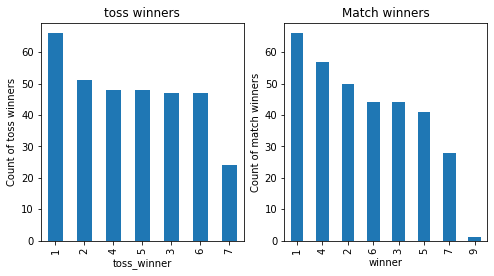

In [87]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('toss_winner')
ax1.set_ylabel('Count of toss winners')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('winner')
ax2.set_ylabel('Count of match winners')
ax2.set_title("Match winners")

<AxesSubplot:>

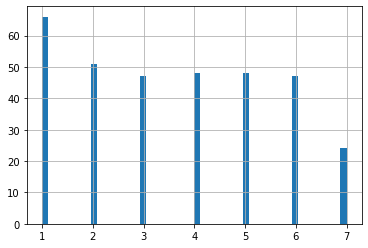

In [88]:
df['toss_winner'].hist(bins=50)

<AxesSubplot:>

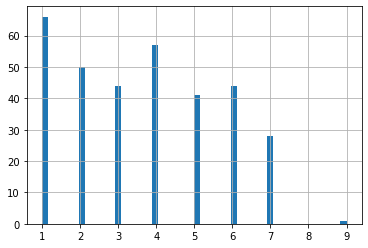

In [89]:
#shows that Mumbai won most matches followed by Chennai
df['winner'].hist(bins=50)


<AxesSubplot:>

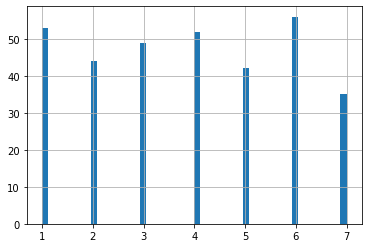

In [90]:
#shows that Mumbai won most matches followed by Chennai
df['team1'].hist(bins=50)


Text(0.5, 1.0, 'Match winners')

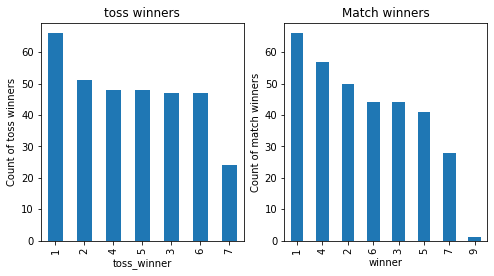

In [91]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('toss_winner')
ax1.set_ylabel('Count of toss winners')
ax1.set_title("toss winners")
temp1.plot(kind='bar')
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('winner')
ax2.set_ylabel('Count of match winners')
ax2.set_title("Match winners")

In [92]:
df.apply(lambda x: sum(x.isnull()),axis=0)


team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [93]:

matches['winner'].fillna('Draw', inplace=True)

In [94]:
#building predictive model , convert categorical to numerical data
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue','team1','team2']
le = LabelEncoder()
for i in var_mod:
 df[i] = le.fit_transform(df[i])
df

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,6,2,13,1,3,20,7
6,1,0,19,1,1,27,1
7,2,5,14,0,3,10,6
9,6,0,19,1,1,27,1
10,5,1,18,1,2,7,2
...,...,...,...,...,...,...,...
623,1,2,18,1,3,7,3
625,2,5,2,1,6,13,3
630,1,6,18,1,7,7,2
633,6,1,8,1,2,8,7


In [95]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
 model.fit(data[predictors],data[outcome])
 predictions = model.predict(data[predictors])
 print(predictions)
 accuracy = metrics.accuracy_score(predictions,data[outcome])
 print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

In [96]:
#Logestic Regression.
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model =LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)


[6 1 7 6 2 1 2 7 2 2 7 6 1 6 3 4 6 1 1 6 1 3 7 1 5 1 6 3 4 4 1 4 4 4 3 2 1
 1 6 4 1 6 1 6 4 2 1 4 4 2 1 5 2 3 4 1 6 6 7 5 1 1 2 5 1 7 4 1 6 5 5 4 1 1
 5 4 2 1 1 2 7 2 4 2 4 2 6 4 1 6 1 3 6 2 4 5 2 4 5 4 4 1 5 4 3 1 4 4 1 2 6
 1 1 2 4 1 5 1 4 2 6 1 2 1 2 5 4 3 2 5 6 6 3 4 1 3 1 1 1 1 4 1 5 1 3 1 4 2
 2 4 4 6 4 4 5 4 4 1 4 3 7 1 1 5 1 1 2 1 6 1 1 4 1 4 7 1 6 3 3 7 6 6 1 7 4
 6 4 1 5 2 5 1 2 5 4 4 7 2 3 1 5 1 5 6 7 1 5 5 1 5 5 2 3 7 1 7 2 4 1 6 6 2
 5 7 2 1 4 5 6 5 3 4 2 2 1 6 6 1 7 6 6 1 2 4 5 4 7 2 4 5 4 7 2 6 2 7 6 3 2
 1 2 2 5 6 1 7 7 2 1 5 4 2 7 1 2 4 1 6 2 3 6 4 7 7 3 2 1 3 6 4 4 2 3 7 1 2
 1 4 7 6 1 5 5 2 5 1 4 2 2 5 1 5 3 6 1 7 3 1 6 3 2 2 5 1 4 7 2 3 2 6 5]
Accuracy : 40.483%


C:\Users\hprak\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hprak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
#Gaussian NAive bayes algorithm
from sklearn.naive_bayes import GaussianNB
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model = GaussianNB() 
classification_model(model, df,predictor_var,outcome_var)


[6 1 4 1 2 1 7 7 2 2 7 6 1 3 3 1 6 1 1 6 1 3 4 1 5 1 6 9 4 4 1 4 5 4 6 2 1
 1 5 4 1 5 1 6 2 2 1 4 4 2 3 5 2 3 4 4 2 3 4 5 1 4 2 5 1 4 1 1 7 5 5 4 1 1
 5 4 2 1 4 2 4 3 1 2 5 2 3 5 1 6 1 3 5 2 4 5 2 4 5 4 4 4 5 1 3 3 4 4 3 2 6
 1 1 2 4 1 5 1 4 2 5 1 2 3 2 5 4 6 2 5 6 6 3 4 1 3 1 1 1 1 4 1 5 1 3 1 4 2
 2 4 5 6 4 1 5 5 5 1 4 6 5 1 1 5 1 1 2 1 6 1 2 4 1 1 4 1 5 3 3 4 5 6 1 7 2
 3 4 1 5 2 7 1 3 5 1 1 4 2 6 1 5 1 7 5 7 2 5 5 1 5 7 2 3 4 2 7 2 1 1 5 5 2
 5 7 4 1 1 5 6 5 4 5 2 2 1 6 6 1 2 5 3 1 2 4 7 4 7 1 4 7 3 4 2 6 2 7 5 3 2
 1 2 2 5 6 1 5 4 2 1 6 3 2 2 1 2 4 3 5 2 3 3 1 4 7 9 3 1 3 5 1 4 7 6 2 4 2
 1 4 7 6 1 5 5 2 7 1 4 2 2 6 1 7 7 6 1 7 5 1 6 3 2 2 5 1 1 7 2 6 7 2 5]
Accuracy : 43.202%


C:\Users\hprak\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [98]:
#applying knn algorithm
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
classification_model(model, df,predictor_var,outcome_var)

[7 1 6 6 2 1 2 7 2 3 7 7 1 6 2 7 6 6 2 2 1 3 4 1 5 1 6 3 4 3 1 1 2 5 6 1 2
 1 4 2 1 6 1 2 4 2 6 4 4 2 5 1 5 1 1 4 2 2 3 7 1 3 3 4 1 3 6 3 3 4 4 5 1 2
 1 2 3 1 1 2 3 3 1 2 3 2 3 5 1 4 1 3 5 1 6 5 1 4 2 4 2 1 5 1 3 5 4 3 1 2 4
 1 1 4 2 1 6 5 4 2 6 1 3 5 2 1 4 6 2 3 6 2 3 4 1 3 1 4 1 1 4 1 5 5 3 1 4 2
 2 3 2 3 4 1 3 1 4 2 2 6 5 1 1 3 1 1 1 1 6 5 1 2 1 4 7 5 3 3 4 2 5 6 5 7 4
 3 4 1 4 2 5 1 4 3 1 7 4 2 6 1 3 1 7 6 7 2 3 1 1 6 7 7 3 7 4 6 2 4 2 5 5 4
 6 6 6 1 1 5 5 6 6 5 7 4 1 6 5 1 2 5 6 1 2 3 1 4 7 2 4 2 5 7 2 6 3 4 6 3 2
 1 2 1 4 2 2 3 4 3 6 3 5 2 7 1 2 5 1 5 7 3 5 1 4 7 3 4 1 3 7 1 4 2 6 4 1 2
 1 4 7 3 1 2 3 4 1 1 2 4 1 3 1 2 4 6 1 7 1 1 7 2 2 7 6 1 1 7 3 6 2 7 3]
Accuracy : 65.559%


C:\Users\hprak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [99]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor)
# Create SVM classification object 
model = svm.SVC(kernel='rbf',gamma='auto') 
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
# there is various option associated with it, like changing kernel, gamma and C value. Will
classification_model(model, df,predictor_var,outcome_var)


C:\Users\hprak\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7 1 6 6 2 1 2 7 1 2 7 7 1 3 3 7 6 6 1 2 1 3 6 1 5 4 6 3 4 3 1 5 6 5 3 1 2
 1 4 6 1 6 1 5 2 2 6 4 4 2 5 4 5 1 3 4 2 5 3 6 1 3 6 4 1 3 6 3 5 4 4 4 1 3
 1 3 5 1 2 2 4 3 1 2 3 2 3 5 1 6 1 3 6 1 6 5 1 4 6 4 6 4 5 6 3 5 4 5 3 2 4
 1 1 4 4 1 6 5 4 2 6 1 2 5 2 1 4 3 2 5 6 5 3 6 1 3 1 4 1 4 4 4 5 5 3 1 4 2
 2 3 6 6 4 1 5 1 4 2 4 3 6 1 1 5 1 1 2 1 6 5 1 4 1 4 7 5 6 3 4 2 5 6 5 7 2
 3 4 1 4 2 5 1 4 5 1 7 4 2 3 1 3 1 4 6 7 2 5 1 1 6 7 6 3 7 4 5 2 1 2 6 5 3
 6 6 4 2 4 5 6 4 6 5 7 4 1 3 5 1 6 7 3 1 2 3 1 4 7 2 4 1 1 7 2 6 2 7 6 3 2
 1 2 4 6 2 1 5 4 2 6 3 1 2 5 1 2 5 3 6 7 3 5 1 4 7 3 4 1 3 7 6 4 2 3 7 4 2
 1 4 7 6 1 2 6 5 1 1 3 4 2 3 1 1 7 6 1 7 1 1 7 3 2 7 6 1 6 7 2 3 2 7 3]
Accuracy : 74.018%


In [100]:
#Decision tree algorithm
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=10, min_samples_leaf=2)
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)


[7 1 6 7 2 1 2 6 1 2 7 6 1 6 2 7 2 6 2 2 1 3 4 1 5 4 6 5 4 4 1 5 2 4 6 1 2
 1 4 6 1 6 1 3 4 5 6 4 4 2 5 4 5 1 3 4 2 2 6 6 1 3 5 4 1 6 6 3 5 5 4 4 1 3
 1 3 5 1 1 2 4 3 1 2 3 2 3 5 3 4 1 3 5 1 6 1 1 4 3 4 2 4 5 1 3 5 4 3 1 2 4
 1 3 1 2 1 4 5 4 2 6 1 2 5 2 6 4 6 2 4 6 3 3 3 1 3 1 4 1 1 4 4 6 5 3 1 4 2
 2 3 2 3 4 6 5 1 4 2 2 6 5 1 3 4 1 1 4 1 4 1 4 2 1 1 7 5 4 3 4 2 5 6 1 7 4
 3 4 1 4 2 5 1 4 5 6 7 4 2 6 1 3 1 4 6 7 2 4 1 1 6 7 1 3 7 4 5 1 1 4 4 5 3
 6 6 5 2 1 5 5 4 2 5 7 4 1 3 5 3 4 7 6 1 2 5 1 4 6 2 3 2 1 7 2 6 2 4 6 3 2
 1 2 1 6 2 2 5 4 2 6 3 1 2 5 1 4 6 1 6 2 3 3 7 4 7 5 4 1 3 6 1 4 2 6 5 4 2
 1 4 7 3 1 7 4 4 1 1 3 4 1 3 1 2 7 2 1 6 6 1 7 2 2 7 6 1 6 7 2 6 2 2 3]
Accuracy : 73.112%


In [101]:
#Random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state =15)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

C:\Users\hprak\AppData\Local\Temp\ipykernel_12868\3867564518.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(data[predictors],data[outcome])


[7 1 6 1 2 1 2 7 1 3 7 7 1 6 2 7 6 6 1 2 1 3 4 1 5 4 6 5 4 4 1 5 2 5 3 1 2
 1 4 6 1 6 1 3 4 5 6 4 4 2 5 4 5 1 3 4 2 5 6 6 1 3 6 4 1 6 6 3 5 5 4 4 1 3
 1 3 5 4 2 2 4 3 1 2 3 4 3 5 3 6 1 3 5 1 2 5 1 4 3 4 6 1 5 6 3 5 4 3 1 2 4
 1 1 4 2 1 6 5 4 2 6 1 3 5 2 1 4 3 4 5 6 3 3 6 5 4 1 4 1 3 4 4 5 5 3 1 4 2
 2 5 2 3 4 1 5 1 6 2 2 3 5 1 1 4 1 1 4 1 6 1 4 2 1 1 7 5 4 3 4 2 5 6 1 7 4
 3 4 1 4 2 5 1 4 5 1 7 4 2 3 1 3 1 4 6 7 2 5 1 1 6 7 6 3 7 4 5 1 1 2 6 5 3
 6 6 4 2 4 5 6 4 6 5 7 4 1 3 5 1 6 7 6 1 2 5 1 4 7 2 3 2 1 7 2 6 3 7 6 3 2
 1 2 4 6 2 1 5 4 3 6 7 1 2 5 1 2 5 1 6 7 4 3 1 4 7 5 4 1 3 7 6 4 2 3 7 1 2
 1 4 7 3 1 3 4 5 1 1 3 4 1 7 1 2 7 6 1 7 1 1 7 2 2 7 3 1 6 7 3 3 2 7 3]
Accuracy : 86.707%
